In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from sspspace import SSPSpace, HexagonalSSPSpace, RandomSSPSpace
from rsspspace import RSSPSpace

In [140]:
sspspace1 = HexagonalSSPSpace(domain_dim=2, ssp_dim=385, 
        domain_bounds=np.array([[-1,1],[-1,1]]), length_scale=0.2)

def length_scale_fun(x):
    length_scale = 10*np.ones(x.shape)
    dist = np.sqrt(np.sum((x - np.pi)**2,axis=1))
    length_scale[dist < 1 ,:] = 0.5 #(dist[dist<1] + 0.5).reshape(-1,1)
    return length_scale #x*(1/((x - np.pi)*length_scale + np.pi))

rsspspace = RSSPSpace(domain_dim=2, ssp_dim=385, 
        domain_bounds=20*np.array([[-1,1],[-1,1]]),
        axis_matrix = sspspace1.axis_matrix,
        length_scale=length_scale_fun)

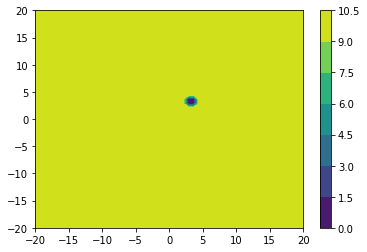

In [141]:
xs = np.linspace(-20,20)
ys = np.linspace(-20,20)
X,Y = np.meshgrid(xs,ys)
xy = np.vstack([X.reshape(-1),Y.reshape(-1)]).T
lenvals = length_scale_fun(xy)
plt.contourf(X,Y,lenvals[:,0].reshape(X.shape))
plt.colorbar()

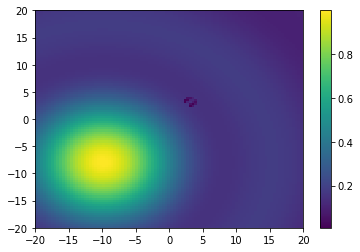

In [142]:
ssp1 = rsspspace.encode(np.atleast_2d(np.array([-10,-8])))

im=rsspspace.similarity_plot(ssp1)
plt.colorbar(im)

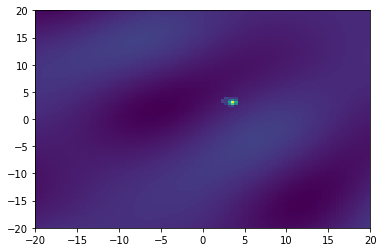

In [143]:
ssp2 = rsspspace.encode(np.atleast_2d(np.array([np.pi+0.3,np.pi-0.2])))
rsspspace.similarity_plot(ssp2)

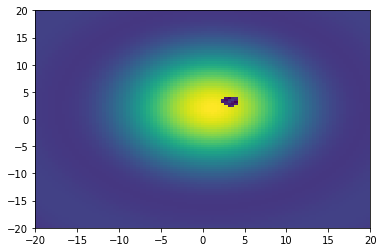

In [144]:
ssp1 = rsspspace.encode(np.atleast_2d(np.array([1,2])))

rsspspace.similarity_plot(ssp1)

In [145]:
easom_func = lambda x: np.cos(x[:,0])*np.cos(x[:,1])*np.exp(-np.sum((x-np.pi)**2,axis=1))

<ipython-input-146-fd42bf5f273c>:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(X,Y,easom_func(xy).reshape(X.shape))


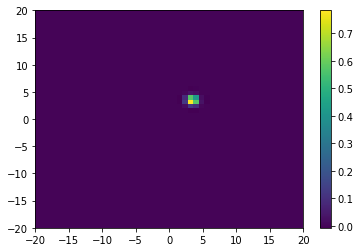

In [146]:
plt.pcolormesh(X,Y,easom_func(xy).reshape(X.shape))
plt.colorbar()

In [147]:
import ssp_bayes_opt

bounds = 20*np.array([[-1,1],[-1,1]])
budget = 200
optimizer = ssp_bayes_opt.BayesianOptimization(f=easom_func, bounds=bounds, 
                                                verbose=True)
        
optimizer.maximize(init_points=10, n_iter=budget,
                    agent_type='ssp-custom',ssp_space=rsspspace)

/home/ns2dumon/anaconda3/lib/python3.8/site-packages/scipy/stats/_qmc.py:1078: UserWarning: The balance properties of Sobol' points require n to be a power of 2.
  warnings.warn("The balance properties of Sobol' points require"


| iter	 | target	 | x	 |
-------------------------------
| 0	 | [[0.22017809]], [142.3261802]	 | [[2.87625418 4.08026756]]	 |
| 1	 | [[1.49781207e-169]], [39.68800777]	 | [[-7.02341137 20.        ]]	 |
| 2	 | [[0.35687795]], [48.05961254]	 | [[2.34113712 3.27759197]]	 |
| 3	 | [[0.76556723]], [30.09645022]	 | [[2.74247492 3.01003344]]	 |
| 4	 | [[0.5094631]], [16.87321766]	 | [[2.60869565 2.74247492]]	 |
| 5	 | [[0.70414404]], [15.43803373]	 | [[2.74247492 3.41137124]]	 |
| 6	 | [[0.32499868]], [31.39406225]	 | [[3.94648829 3.41137124]]	 |
| 7	 | [[0.41733043]], [6.59540072]	 | [[2.60869565 3.67892977]]	 |
| 8	 | [[0.24914684]], [19.3873806]	 | [[3.81270903 3.81270903]]	 |
| 9	 | [[0.76556723]], [8.24721709e-13]	 | [[2.74247492 3.01003344]]	 |
| 10	 | [[0.]], [22.87399868]	 | [[-18.66220736  20.        ]]	 |
| 11	 | [[0.23616618]], [24.05401053]	 | [[3.67892977 2.34113712]]	 |
| 12	 | [[1.22003353e-32]], [13.50289515]	 | [[11.0367893   5.95317726]]	 |
| 13	 | [[0.64839589]], [0.8718819

/home/ns2dumon/anaconda3/lib/python3.8/site-packages/ssp_bayes_opt-0.1-py3.8.egg/ssp_bayes_opt/blr.py:55: RuntimeWarning: covariance is not positive-semidefinite.
  phi_init = np.atleast_2d(np.random.multivariate_normal(self.m.flatten(),


| 88	 | [[0.22017809]], [5.15451068e-13]	 | [[4.08026756 2.87625418]]	 |
| 89	 | [[0.23616618]], [6.18541282e-13]	 | [[3.67892977 2.34113712]]	 |
| 90	 | [[5.33484013e-154]], [0.00033316]	 | [[11.30434783 20.        ]]	 |
| 91	 | [[2.08566502e-80]], [0.00108619]	 | [[  2.60869565 -10.36789298]]	 |
| 92	 | [[0.23810032]], [0.00083125]	 | [[4.08026756 3.27759197]]	 |
| 93	 | [[0.32126564]], [8.48602826e-05]	 | [[3.67892977 3.81270903]]	 |
| 94	 | [[0.24834218]], [0.0001131]	 | [[2.20735786 3.14381271]]	 |
| 95	 | [[0.35271828]], [6.42593293e-05]	 | [[3.27759197 3.94648829]]	 |
| 96	 | [[0.58317138]], [9.38732764e-06]	 | [[2.87625418 2.60869565]]	 |
| 97	 | [[0.49095955]], [3.66512925e-06]	 | [[2.47491639 3.01003344]]	 |
| 98	 | [[0.28494341]], [2.62624418e-05]	 | [[3.94648829 2.74247492]]	 |
| 99	 | [[0.5094631]], [3.66579522e-08]	 | [[2.74247492 2.60869565]]	 |
| 100	 | [[-5.71919754e-88]], [3.19862209e-05]	 | [[-10.36789298   7.2909699 ]]	 |
| 101	 | [[3.69593777e-37]], [3.97323367e-05

SystemError: <class 'numpy.linalg.LinAlgError'> returned a result with an error set

In [162]:
vals = np.zeros((10 + budget,))

for i, res in enumerate(optimizer.res):
    vals[i] = res['target']
    #if i >0:
     #   vals[i] = np.max(vals[:i])
best_vals = [ for i in range(10 + budget)]

In [154]:
np.max([res['target'],vals[:i]])

array([], dtype=float64)

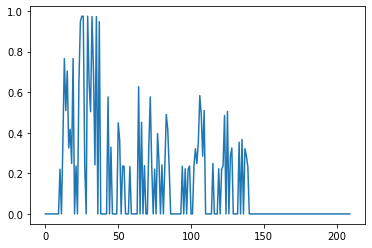

In [163]:
plt.figure()
plt.plot(vals)

In [134]:
sspspace1 = HexagonalSSPSpace(domain_dim=2, ssp_dim=385, 
        domain_bounds=np.array([[-1,1],[-1,1]]), length_scale=0.2)

def length_scale_fun(x):
    length_scale = 10*np.ones(x.shape)
    dist = np.sqrt(np.sum(x**2,axis=1))
    length_scale = -20*np.exp(-(dist + 0.1)).reshape(-1,1)
    return length_scale - np.min(length_scale) + 1

rsspspace = RSSPSpace(domain_dim=2, ssp_dim=385, 
        domain_bounds=20*np.array([[-1,1],[-1,1]]),
        axis_matrix = sspspace1.axis_matrix,
        length_scale=length_scale_fun)

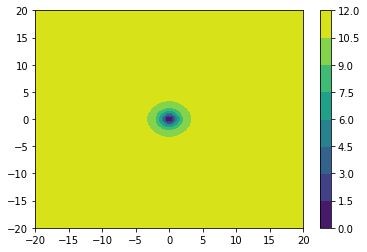

In [135]:
xs = np.linspace(-20,20)
ys = np.linspace(-20,20)
X,Y = np.meshgrid(xs,ys)
xy = np.vstack([X.reshape(-1),Y.reshape(-1)]).T
lenvals = length_scale_fun(xy)
plt.contourf(X,Y,lenvals[:,0].reshape(X.shape))
plt.colorbar()

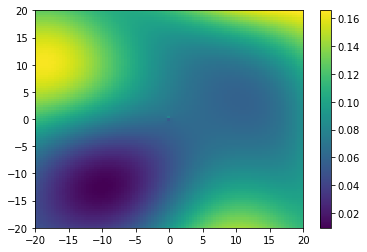

In [136]:
ssp1 = rsspspace.encode(np.atleast_2d(np.array([-10,-8])))

im=rsspspace.similarity_plot(ssp1)
plt.colorbar(im)

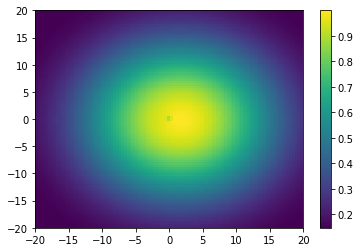

In [137]:
ssp1 = rsspspace.encode(np.atleast_2d(np.array([0.1,-0.02])))
im=rsspspace.similarity_plot(ssp1)
plt.colorbar(im)

In [43]:
def julia_recurse(z, c, n_iter=1000, R=10):
    if abs(z) > R or n_iter <= 0:
        return 0
    return 1 + julia_recurse(z**2 + c, c, n_iter - 1)
    
    
def julia_set(c, n_iter=1000, R=10,
              resolution=(500, 500),
              x=(-1.5, 1.5), y=(-1.5, 1.5)):
    """Adapted from https://scipython.com/book/chapter-7-matplotlib/problems/p72/the-julia-set/"""
    im_width, im_height = resolution
    xmin, xmax = x
    xwidth = xmax - xmin
    ymin, ymax = y
    yheight = ymax - ymin

    julia = np.zeros((im_height, im_width))
    for ix in range(im_width):
        for iy in range(im_height):
            nit = 0
            # Map pixel position to a point in the complex plane
            z = complex(ix / im_width * xwidth + xmin,
                        iy / im_height * yheight + ymin)
            # Do the iterations
            ratio = julia_recurse(z, c, n_iter, R) / n_iter
            julia[im_height-1-iy, ix] = ratio

    return julia

In [44]:
zoom = 0.5  # 1.45
res = 501
# c = complex(-0.4, 0.6)
c = complex(-0.1, 0.65)

R = np.roots([1, -1, -np.abs(c)])[0]
R

1.4527052649682877

In [77]:
sspspace1 = HexagonalSSPSpace(domain_dim=2, ssp_dim=385, 
        domain_bounds=np.array([[-1,1],[-1,1]]), length_scale=zoom)

def axis_matrix_fun(x):
    x = x.reshape(-1)
    i = julia_recurse(x[0] + 1j * x[1], c,R=R) / 50
    
    return np.fft.ifft(np.fft.fft(sspspace1.axis_matrix,axis=0)**i,axis=0).real


rsspspace = RSSPSpace(domain_dim=2, ssp_dim=385, 
        domain_bounds=20*np.array([[-1,1],[-1,1]]),
        axis_matrix = axis_matrix_fun,length_scale=lambda x: 1/4*np.ones(x.shape))

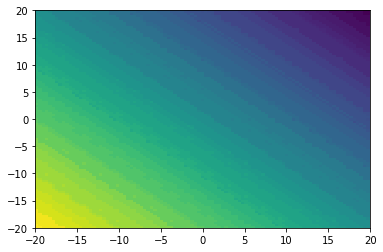

In [78]:
ssp1 = rsspspace.encode(np.atleast_2d(np.array([-10,-8])))
rsspspace.similarity_plot(ssp1)

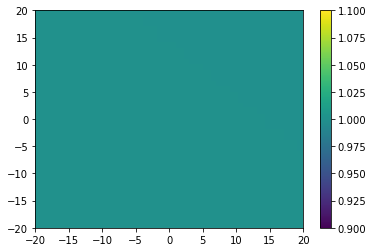

In [63]:
ssp1 = rsspspace.encode(np.atleast_2d(np.array([0,0])))
im = rsspspace.similarity_plot(ssp1)
plt.colorbar(im)

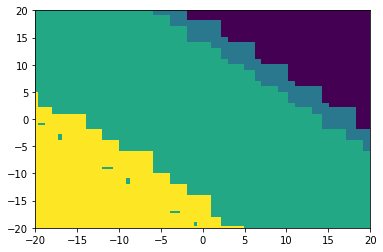

In [64]:
ssp2 = rsspspace.encode(np.atleast_2d(np.array([np.pi+0.3,np.pi-0.2])))
rsspspace.similarity_plot(ssp2)